# Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

## Загрузка и первичный анализ данных

In [2]:
data = pd.read_csv('./laptopData.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(1303, 12)

In [4]:
data.drop('Unnamed', axis=1, inplace=True)
data['Inches'] = data['Inches'].astype(float)

In [5]:
# типы колонок
data.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [6]:
# проверим есть ли пропущенные значения
data.isnull().sum()

Company             30
TypeName            30
Inches              31
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              31
Gpu                 30
OpSys               30
Weight              31
Price               30
dtype: int64

In [7]:
# Первые 5 строк датасета
data.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [8]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1303


# Обработка пропусков в данных

## Простые стратегии - удаление или заполнение нулями

Удаление колонок, содержащих пустые значения
`res = data.dropna(axis=1, how='any')`

Удаление строк, содержащих пустые значения
`res = data.dropna(axis=0, how='any')`

In [9]:
# Удаление колонок, содержащих пустые значения
data_new_1 = data.dropna(axis=1, how='any')
(data.shape, data_new_1.shape)

((1303, 11), (1303, 0))

In [10]:
# Удаление строк, содержащих пустые значения
data_new_2 = data.dropna(axis=0, how='any')
(data.shape, data_new_2.shape)

((1303, 11), (1270, 11))

In [11]:
# Заполнение всех пропущенных значений нулями
# В данном случае это некорректно, так как нулями заполняются в том числе категориальные колонки
data_new_3 = data.fillna(0)
data_new_3.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## "Внедрение значений" - импьютация (imputation)

### Обработка пропусков в числовых данных

In [12]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Inches. Тип данных float64. Количество пустых значений 31, 2.38%.
Колонка Price. Тип данных float64. Количество пустых значений 30, 2.3%.


In [13]:
# Фильтр по колонкам с пропущенными значениями
data_num = data[num_cols]
data_num

,Inches,Price
0,13.3,71378.6832
1,13.3,47895.5232
2,15.6,30636.0000
3,15.4,135195.3360
4,13.3,96095.8080
...,...,...
1298,14.0,33992.6400
1299,13.3,79866.7200
1300,14.0,12201.1200
1301,15.6,40705.9200


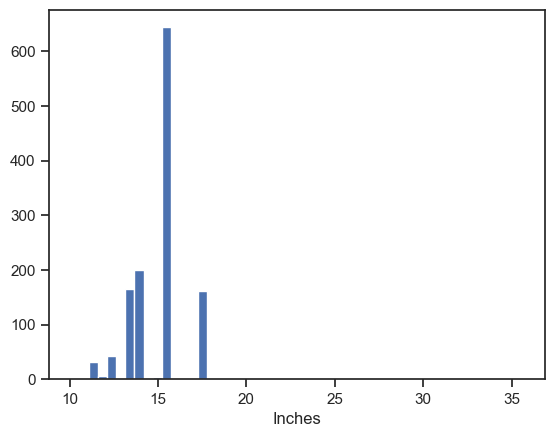

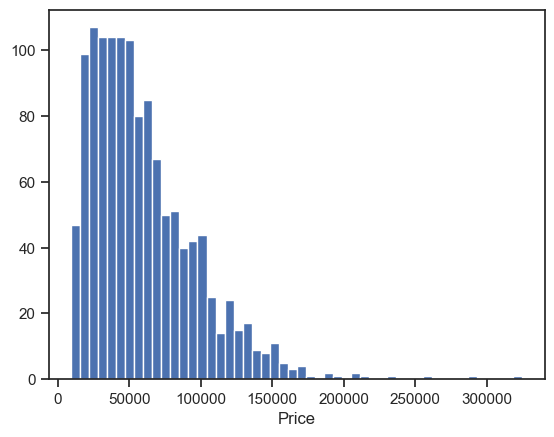

In [14]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(data[col], 50)
    plt.xlabel(col)
    plt.show()

In [15]:
data_num_inches = data_num[['Inches']]
data_num_inches.head()

,Inches
0,13.3
1,13.3
2,15.6
3,15.4
4,13.3


In [16]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [17]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_inches)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

С помощью класса [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html#sklearn.impute.SimpleImputer) можно проводить импьютацию различными [показателями центра распределения](https://ru.wikipedia.org/wiki/%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7%D0%B0%D1%82%D0%B5%D0%BB%D0%B8_%D1%86%D0%B5%D0%BD%D1%82%D1%80%D0%B0_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F)

In [18]:
strategies=['mean', 'median', 'most_frequent']

In [19]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_inches)
    return data_num_imp[mask_missing_values_only]

In [20]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761, 15.13081761, 15.13081761, 15.13081761, 15.13081761,
        15.13081761]))

In [21]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6,
        15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6,
        15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6]))

In [22]:
strategies[2], test_num_impute(strategies[2])

('most_frequent',
 array([15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6,
        15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6,
        15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6, 15.6]))

In [23]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [24]:
data[['Inches']].describe()

,Inches
count,1272.000000
mean,15.130818
std,1.954436
min,10.100000
25%,14.000000
50%,15.600000
75%,15.600000
max,35.600000


In [25]:
test_num_impute_col(data, 'Inches', strategies[0])

('Inches', 'mean', 31, 15.130817610062895, 15.130817610062895)

In [26]:
test_num_impute_col(data, 'Inches', strategies[1])

('Inches', 'median', 31, 15.6, 15.6)

In [27]:
test_num_impute_col(data, 'Inches', strategies[2])

('Inches', 'most_frequent', 31, 15.6, 15.6)

### Обработка пропусков в категориальных данных

In [28]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Company. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка TypeName. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка ScreenResolution. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка Cpu. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка Ram. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка Memory. Тип данных object. Количество пустых значений 31, 2.38%.
Колонка Gpu. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка OpSys. Тип данных object. Количество пустых значений 30, 2.3%.
Колонка Weight. Тип данных object. Количество пустых значений 31, 2.38%.


Класс SimpleImputer можно использовать для категориальных признаков со стратегиями "most_frequent" или "constant".

In [29]:
cat_temp_data = data[['Company']]
cat_temp_data.head()

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple


In [30]:
cat_temp_data['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', nan, 'Chuwi',
       'MSI', 'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [31]:
cat_temp_data[cat_temp_data['Company'].isnull()].shape

(30, 1)

In [32]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Apple'],
       ['Apple'],
       ['HP'],
       ...,
       ['Lenovo'],
       ['HP'],
       ['Asus']], dtype=object)

In [33]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object)

In [34]:
# Импьютация константой
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(cat_temp_data)
data_imp3

array([['Apple'],
       ['Apple'],
       ['HP'],
       ...,
       ['Lenovo'],
       ['HP'],
       ['Asus']], dtype=object)

In [35]:
np.unique(data_imp3)

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'NA', 'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'],
      dtype=object)

In [36]:
data_imp3[data_imp3=='NA'].size

30

# Преобразование категориальных признаков в числовые

In [37]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1298,Lenovo
1299,Lenovo
1300,Lenovo
1301,HP


## Кодирование категорий целочисленными значениями (label encoding)

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

- [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
- [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
cat_enc['c1'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [40]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [41]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Acer', 'Apple', 'Asus', 'Chuwi', 'Dell', 'Fujitsu', 'Google',
       'HP', 'Huawei', 'LG', 'Lenovo', 'MSI', 'Mediacom', 'Microsoft',
       'Razer', 'Samsung', 'Toshiba', 'Vero', 'Xiaomi'], dtype=object)

In [42]:
cat_enc_le

array([ 1,  1,  7, ..., 10,  7,  2])

In [43]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [44]:
# В этом примере видно, что перед кодированием 
# уникальные значения признака сортируются в лексикографиеском порядке
le.inverse_transform([0, 1, 2, 3])

array(['Acer', 'Apple', 'Asus', 'Chuwi'], dtype=object)

### Использование OrdinalEncoder

In [45]:
from sklearn.preprocessing import OrdinalEncoder

In [46]:
data_oe = data[['TypeName', 'Gpu', 'OpSys']]
data_oe.head()

,TypeName,Gpu,OpSys
0,Ultrabook,Intel Iris Plus Graphics 640,macOS
1,Ultrabook,Intel HD Graphics 6000,macOS
2,Notebook,Intel HD Graphics 620,No OS
3,Ultrabook,AMD Radeon Pro 455,macOS
4,Ultrabook,Intel Iris Plus Graphics 650,macOS


In [47]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled

array([['Ultrabook', 'Intel Iris Plus Graphics 640', 'macOS'],
       ['Ultrabook', 'Intel HD Graphics 6000', 'macOS'],
       ['Notebook', 'Intel HD Graphics 620', 'No OS'],
       ...,
       ['Notebook', 'Intel HD Graphics', 'Windows 10'],
       ['Notebook', 'AMD Radeon R5 M330', 'Windows 10'],
       ['Notebook', 'Intel HD Graphics', 'Windows 10']], dtype=object)

In [48]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 5., 58.,  9.],
       [ 5., 51.,  9.],
       [ 4., 53.,  5.],
       ...,
       [ 4., 40.,  6.],
       [ 4., 21.,  6.],
       [ 4., 40.,  6.]])

In [49]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0., 1., 2., 3., 4., 5., 6.])

In [50]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110.])

In [51]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [52]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['2 in 1 Convertible', 'Gaming', 'NA', 'Netbook', 'Notebook',
        'Ultrabook', 'Workstation'], dtype=object),
 array(['AMD FirePro W4190M', 'AMD FirePro W4190M ', 'AMD FirePro W5130M',
        'AMD FirePro W6150M', 'AMD R17M-M1-70', 'AMD R4 Graphics',
        'AMD Radeon 520', 'AMD Radeon 530', 'AMD Radeon 540',
        'AMD Radeon Pro 455', 'AMD Radeon Pro 555', 'AMD Radeon Pro 560',
        'AMD Radeon R2', 'AMD Radeon R2 Graphics', 'AMD Radeon R3',
        'AMD Radeon R4', 'AMD Radeon R4 Graphics', 'AMD Radeon R5',
        'AMD Radeon R5 430', 'AMD Radeon R5 520', 'AMD Radeon R5 M315',
        'AMD Radeon R5 M330', 'AMD Radeon R5 M420', 'AMD Radeon R5 M420X',
        'AMD Radeon R5 M430', 'AMD Radeon R7', 'AMD Radeon R7 Graphics',
        'AMD Radeon R7 M360', 'AMD Radeon R7 M365X', 'AMD Radeon R7 M440',
        'AMD Radeon R7 M445', 'AMD Radeon R7 M460', 'AMD Radeon R7 M465',
        'AMD Radeon R9 M385', 'AMD Radeon RX 540', 'AMD Radeon RX 550',
        'AMD Radeon RX 5

In [53]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Ultrabook', 'Intel Iris Plus Graphics 640', 'macOS'],
       ['Ultrabook', 'Intel HD Graphics 6000', 'macOS'],
       ['Notebook', 'Intel HD Graphics 620', 'No OS'],
       ...,
       ['Notebook', 'Intel HD Graphics', 'Windows 10'],
       ['Notebook', 'AMD Radeon R5 M330', 'Windows 10'],
       ['Notebook', 'Intel HD Graphics', 'Windows 10']], dtype=object)

### Проблемы использования LabelEncoder и OrdinalEncoder

Необходимо отметить, что LabelEncoder и OrdinalEncoder могут использоваться только для категориальных признаков в номинальных шкалах (для которых отсутствует порядок), например города, страны, названия рек и т.д. 

Это связано с тем, что задать какой-либо порядок при кодировании с помощью LabelEncoder и OrdinalEncoder невозможно, они сортируют категории в лексикографическом порядке.

При этом кодирование целыми числами создает фиктивное отношение порядка (1 < 2 < 3 < ...) которого не было в исходных номинальных шкалах. Данное отношение порядка может негативно повлиять на построение модели машинного обучения.

### Кодирование шкал порядка

Библиотека scikit-learn не предоставляет готового решения для кодирования шкал порядка, но можно воспользоваться [функцией map для отдельных объектов Series.](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html)

In [54]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [55]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [56]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [57]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


## Кодирование категорий наборами бинарных значений - [one-hot encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html)

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [58]:
from sklearn.preprocessing import OneHotEncoder

In [59]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [60]:
cat_enc.shape

(1303, 1)

In [61]:
cat_enc_ohe.shape

(1303, 19)

In [62]:
cat_enc_ohe

<1303x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1303 stored elements in Compressed Sparse Row format>

In [63]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0.]])

In [64]:
cat_enc.head(10)

,c1
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
5,Acer
6,Apple
7,Apple
8,Asus
9,Acer


## [Pandas get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html) - быстрый вариант one-hot кодирования

In [65]:
pd.get_dummies(cat_enc).head()

,c1_Acer,c1_Apple,c1_Asus,c1_Chuwi,c1_Dell,c1_Fujitsu,c1_Google,c1_HP,c1_Huawei,c1_LG,c1_Lenovo,c1_MSI,c1_Mediacom,c1_Microsoft,c1_Razer,c1_Samsung,c1_Toshiba,c1_Vero,c1_Xiaomi
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [66]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,Company_HP,Company_Huawei,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Company_nan
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Масштабирование данных

Термины "масштабирование" и "нормализация" часто используются как синонимы, но это неверно. Масштабирование предполагает изменение диапазона измерения величины, а нормализация - изменение распределения этой величины. В этом разделе рассматривается только масштабирование.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:
- MinMax масштабирование:
$$ x_{новый} = \frac{x_{старый} - min(X)}{max(X)-min(X)} $$

В этом случае значения лежат в диапазоне от 0 до 1.
- Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0):
$$ x_{новый} = \frac{x_{старый} - AVG(X) }{\sigma(X)} $$

В этом случае большинство значений попадает в диапазон от -3 до 3.

где $X$ - матрица объект-признак, $AVG(X)$ - среднее значение, $\sigma$ - среднеквадратичное отклонение.

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

## [MinMax масштабирование](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)

In [68]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[['Price']])

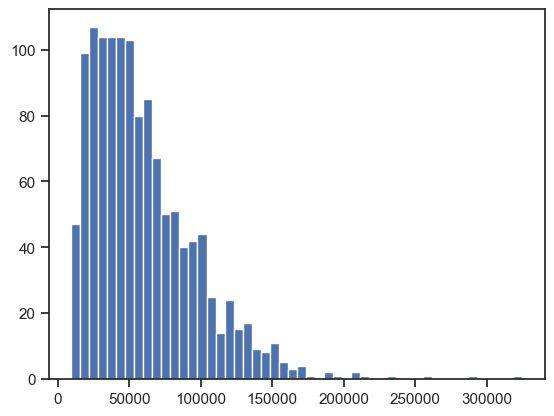

In [69]:
plt.hist(data['Price'], 50)
plt.show()

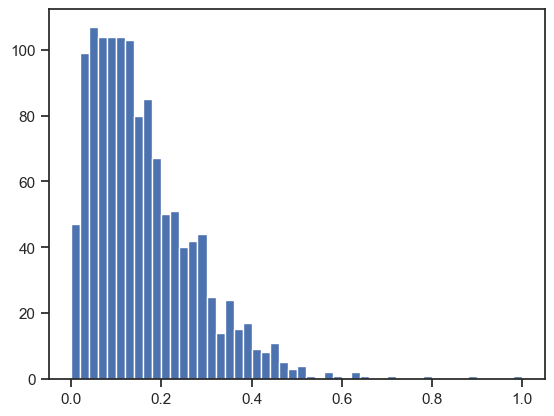

In [70]:
plt.hist(sc1_data, 50)
plt.show()

## Масштабирование данных на основе [Z-оценки](https://ru.wikipedia.org/wiki/Z-%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0) - [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [71]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(data[['Price']])

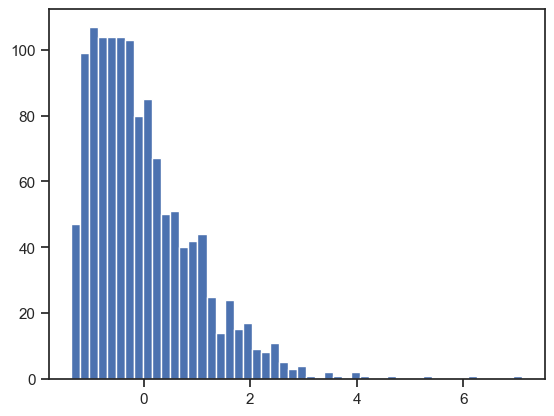

In [72]:
plt.hist(sc2_data, 50)
plt.show()